## SVM on selected features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('selected_features.csv', index_col = 0)
df.head()

,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Neighborhood_Crawfor,SalePrice
0,3.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,4.0,4.0,...,1710.0,4.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,208500
1,3.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,3.0,4.0,...,1262.0,3.0,6.0,1.0,2.0,460.0,298.0,0.0,0.0,181500
2,3.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,4.0,4.0,...,1786.0,4.0,6.0,1.0,2.0,608.0,0.0,42.0,0.0,223500
3,3.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,3.0,3.0,...,1717.0,4.0,7.0,1.0,1.0,642.0,0.0,35.0,1.0,140000
4,3.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,4.0,4.0,...,2198.0,4.0,9.0,1.0,2.0,836.0,192.0,84.0,0.0,250000


In [3]:
y = np.log(df['SalePrice'])
x = df.drop(labels = 'SalePrice', axis=1).astype("float64")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [4]:
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [5]:
pipe = Pipeline(steps= [('ss', StandardScaler()), ('clf', SVR(gamma='scale'))])
param_grid = {'clf__C':[0.1, 0.5, 1.0, 1.5, 10, 100, 150],'clf__kernel': ['linear', 'rbf', 'sigmoid', 'poly']}
search = GridSearchCV(pipe, param_grid, cv=5, iid=False, scoring='neg_mean_absolute_error', return_train_score=False)

In [6]:
search.fit(x, y)
print(search.best_params_)

C:\Users\admin1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [8]:
svr = SVR(kernel='linear', gamma ='scale', C = 0.1)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [9]:
svr.score(x_test,y_test)

0.8997904544617666

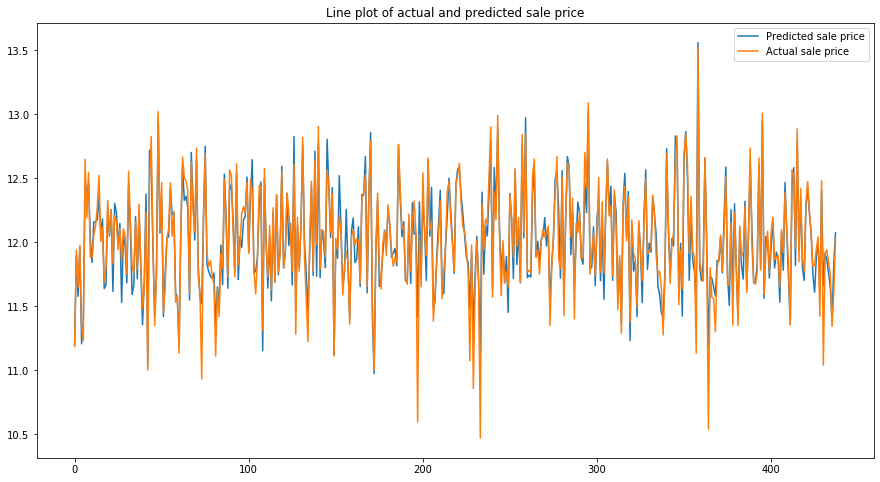

In [10]:
plt.figure(figsize=(15,8))
plt.plot((y_pred), label='Predicted sale price')
plt.plot((y_test.values), label='Actual sale price')
plt.title('Line plot of actual and predicted sale price')
plt.legend();